In [1]:
import time

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import logging

import elfi
from elfi.examples.ma2 import get_model
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20180712
np.random.seed(seed)
N=1000

## Rejection sampling (MA2 model)

In [2]:
m = get_model()

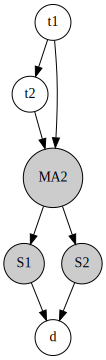

In [3]:
elfi.draw(m)

In [4]:
type(m['d'])

elfi.model.elfi_model.Distance

In [5]:
rej = elfi.Rejection(m['d'], batch_size=10000)

In [6]:
%time result2 = rej.sample(N, threshold=0.1)
result2

Progress bar with threshold is not supported.
CPU times: user 1.12 s, sys: 140 ms, total: 1.26 s
Wall time: 1.28 s


Method: Rejection
Number of samples: 1000
Number of simulations: 200000
Threshold: 0.0968
Sample means: t1: 0.695, t2: 0.523

In [7]:
%time result = rej.sample(N, quantile=0.001)
result

CPU times: user 5.46 s, sys: 552 ms, total: 6.01 s
Wall time: 5.97 s


Method: Rejection
Number of samples: 1000
Number of simulations: 1000000
Threshold: 0.0434
Sample means: t1: 0.69, t2: 0.518

In [8]:
%time result3 = rej.sample(N, n_sim=1000000)
result3

CPU times: user 5.28 s, sys: 608 ms, total: 5.88 s
Wall time: 5.84 s


Method: Rejection
Number of samples: 1000
Number of simulations: 1000000
Threshold: 0.0434
Sample means: t1: 0.69, t2: 0.518

## Sequential Monte Carlo ABC

In [9]:
smc = elfi.SMC(m['d'], batch_size=10000, seed=seed)

In [10]:
N = 1000
schedule = [0.7, 0.2, 0.05]
%time result_smc = smc.sample(N, schedule)
result_smc

INFO:elfi.methods.parameter_inference:---------------- Starting round 0 ----------------
INFO:elfi.methods.parameter_inference:---------------- Starting round 1 ----------------


Progress bar with threshold is not supported.


INFO:elfi.methods.parameter_inference:---------------- Starting round 2 ----------------


CPU times: user 1.22 s, sys: 120 ms, total: 1.34 s
Wall time: 1.34 s


Method: SMC
Number of samples: 1000
Number of simulations: 170000
Threshold: 0.0484
Sample means: t1: 0.688, t2: 0.518

In [11]:
# result_smc.save_samples(type_='csv')

In [12]:
# import pandas as pd

In [13]:
# df = pd.read_csv('smcsample_samples.csv')

In [14]:
# df.head()

In [15]:
# result_smc.save_samples(type_='json')

In [16]:
# dj = pd.read_json('smcsample_samples.json')

In [17]:
# dj.head()

## Bayesian Optimization

In [18]:
log_d = elfi.Operation(np.log, m['d'], name='log_d')

In [19]:
type(log_d)

elfi.model.elfi_model.Operation

In [20]:
res_init = elfi.Rejection(log_d, batch_size=5).sample(20, quantile=2)

In [21]:
res_init

Method: Rejection
Number of samples: 20
Number of simulations: 10
Threshold: inf
Sample means: t1: 0.598, t2: -0.448

In [22]:
bounds = {n: (-2, 2) for n in m.parameter_names}

In [23]:
bounds

{'t1': (-2, 2), 't2': (-2, 2)}

In [24]:
bo = elfi.BayesianOptimization(
        log_d, initial_evidence=res_init.outputs, update_interval=10, batch_size=5, bounds=bounds)

 /l/musaevm1/anaconda3/elfi_test/lib/python3.6/site-packages/GPy/core/parameterization/priors.py:336: RuntimeWarning:invalid value encountered in double_scalars
 /l/musaevm1/anaconda3/elfi_test/lib/python3.6/site-packages/GPy/core/parameterization/priors.py:337: RuntimeWarning:invalid value encountered in double_scalars


In [25]:
bo

## BOLFI